# Basic PyTorch Neural Network
* create a multi-layer deep learning model
* load data
* train and validate the model<br>

We'll also introduce a new step:
* save and load a trained model

Our goal is to develop a model capable of classifying an iris plant based on four features. This is a multi-class classification where each sample can belong to ONE of 3 classes (<em>Iris setosa</em>, <em>Iris virginica</em> or <em>Iris versicolor</em>). The network will have 4 input neurons (flower dimensions) and 3 output neurons (scores). Our loss function will compare the target label (ground truth) to the corresponding output score.

<div class="alert alert-info"><strong>NOTE:</strong> Multi-class classifications usually involve converting the target vector to a one_hot encoded matrix. That is, if 5 labels show up as<br>
<pre style='background-color:rgb(217,237,247)'>tensor([0,2,1,0,1])</pre>
then we would encode them as:
<pre style='background-color:rgb(217,237,247)'>tensor([[1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0]])</pre>
This is easily accomplished with <a href='https://pytorch.org/docs/stable/nn.html#one-hot'><strong><tt>torch.nn.functional.one_hot()</tt></strong></a>.<br>
However, our loss function <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a> takes care of this for us.</div>

## Perform standard imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create a model class
For this exercise we're using the Iris dataset. Since a single straight line can't classify three flowers we should include at least one hidden layer in our model.

In the forward section we'll use the <a href='https://en.wikipedia.org/wiki/Rectifier_(neural_networks)'>rectified linear unit</a> (ReLU)  function<br>
$\quad f(x)=max(0,x)$<br>
as our activation function. This is available as a full module <a href='https://pytorch.org/docs/stable/nn.html#relu'><strong><tt>torch.nn.ReLU</tt></strong></a> or as just a functional call <a href='https://pytorch.org/docs/stable/nn.html#id27'><strong><tt>torch.nn.functional.relu</tt></strong></a>

In [ ]:
help(nn.Linear)

Help on class Linear in module torch.nn.modules.linear:

class Linear(torch.nn.modules.module.Module)
 |  Linear(in_features: int, out_features: int, bias: bool = True, device=None, dtype=None) -> None
 |  
 |  Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
 |  
 |  This module supports :ref:`TensorFloat32<tf32_on_ampere>`.
 |  
 |  On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.
 |  
 |  Args:
 |      in_features: size of each input sample
 |      out_features: size of each output sample
 |      bias: If set to ``False``, the layer will not learn an additive bias.
 |          Default: ``True``
 |  
 |  Shape:
 |      - Input: :math:`(*, H_{in})` where :math:`*` means any number of
 |        dimensions including none and :math:`H_{in} = \text{in\_features}`.
 |      - Output: :math:`(*, H_{out})` where all but the last dimension
 |        are the same shape as the input and :math

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer

    def forward(self, x):
        x = F.relu(self.fc1(x)) # we can also call it as a1 and pass a1 to next layer
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model = Model()

## Load the iris dataset

In [ ]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Plot the dataset
The iris dataset has 4 features. To get an idea how they correlate we can plot four different relationships among them.<br>
We'll use the index positions of the columns to grab their names in pairs with <tt>plots = [(0,1),(2,3),(0,2),(1,3)]</tt>.<br>
Here <tt>(0,1)</tt> sets "sepal length (cm)" as <tt>x</tt> and "sepal width (cm)" as <tt>y</tt>

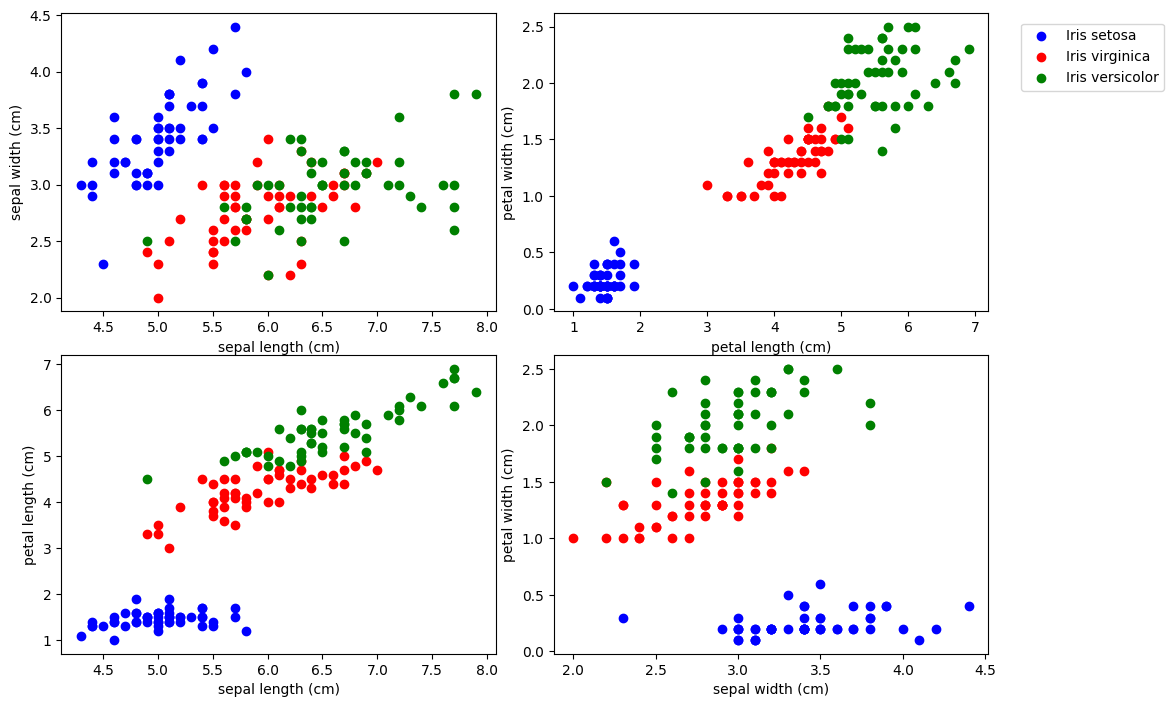

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

## Perform Train/Test/Split

In [ ]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))
 # one hot encoding not needed with Cross Entropy Loss
 # When working with multiclass classifications we have to do one hot encoding for output
 # But with pyto/rch if we use cross enttopy loss we need not do one hot encoding
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Prepare DataLoader
For this analysis we don't need to create a Dataset object, but we should take advantage of PyTorch's DataLoader tool. Even though our dataset is small (120 training samples), we'll load it into our model in two batches. This technique becomes very helpful with large datasets.

Note that scikit-learn already shuffled the source dataset before preparing train and test sets. We'll still benefit from the DataLoader shuffle utility for model training if we make multiple passes throught the dataset.

In [ ]:
X_train.shape

torch.Size([120, 4])

In [ ]:
X_test.shape

torch.Size([30, 4])

In [ ]:
X_train

tensor([[5.6000, 2.7000, 4.2000, 1.3000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [7.0000, 3.2000, 4.7000, 1

y_train = y_train.reshape(-1,1)
 if i reshape i am getting error at Cross_entropy
 6     y_pred = model.forward(X_train)
----> 7     loss = criterion(y_pred, y_train)
      8     losses.append(loss.detach().numpy())
      9

2 frames
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py in cross_entropy(input, target, weight, size_average, ignore_index, reduce, reduction, label_smoothing)
   3027     if size_average is not None or reduce is not None:
   3028         reduction = _Reduction.legacy_get_string(size_average, reduce)
-> 3029     return torch._C._nn.cross_entropy_loss(input, target, weight, _Reduction.get_enum(reduction), ignore_index, label_smoothing)
   3030
   3031

RuntimeError: 0D or 1D target tensor expected, multi-target not supported

In [ ]:
y_train

tensor([1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1,
        2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1,
        2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0])

In [ ]:
# we hhave to actually get train tensor dataset and test tensor dataset and then get loader for train and test

# iris = TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))
# iris_loader = DataLoader(iris, batch_size=50, shuffle=True)
trainloader = DataLoader(X_train,batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

as seen in  02-DataSets-with-Pytorch.ipynb we have to create iris_loader and iris = TensorDataset and then pass them to in a for loop inside for i in range(epochs), pass them as for i in list(loader)

Something like merge the X_train and X_test in to a tensordataset and pass it to a loader

In [ ]:
trainloader

## Define loss equations and optimizations
As before, we'll utilize <a href='https://en.wikipedia.org/wiki/Cross_entropy'>Cross Entropy</a> with <a href='https://pytorch.org/docs/stable/nn.html#crossentropyloss'><strong><tt>torch.nn.CrossEntropyLoss()</tt></strong></a><br>
For the optimizer, we'll use a variation of Stochastic Gradient Descent called <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam'>Adam</a> (short for Adaptive Moment Estimation), with <a href='https://pytorch.org/docs/stable/optim.html#torch.optim.Adam'><strong><tt>torch.optim.Adam()</tt></strong></a>

In [ ]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
help(nn.CrossEntropyLoss)

Help on class CrossEntropyLoss in module torch.nn.modules.loss:

class CrossEntropyLoss(_WeightedLoss)
 |  CrossEntropyLoss(weight: Optional[torch.Tensor] = None, size_average=None, ignore_index: int = -100, reduce=None, reduction: str = 'mean', label_smoothing: float = 0.0) -> None
 |  
 |  This criterion computes the cross entropy loss between input logits
 |  and target.
 |  
 |  It is useful when training a classification problem with `C` classes.
 |  If provided, the optional argument :attr:`weight` should be a 1D `Tensor`
 |  assigning weight to each of the classes.
 |  This is particularly useful when you have an unbalanced training set.
 |  
 |  The `input` is expected to contain the unnormalized logits for each class (which do `not` need
 |  to be positive or sum to 1, in general).
 |  `input` has to be a Tensor of size :math:`(C)` for unbatched input,
 |  :math:`(minibatch, C)` or :math:`(minibatch, C, d_1, d_2, ..., d_K)` with :math:`K \geq 1` for the
 |  `K`-dimensional cas

## Train the model

In [ ]:
y_train

tensor([1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1,
        2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1,
        2, 0, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 0])

In [ ]:
help(optimizer.zero_grad)

Help on method zero_grad in module torch.optim.optimizer:

zero_grad(set_to_none: bool = True) method of torch.optim.adam.Adam instance
    Sets the gradients of all optimized :class:`torch.Tensor` s to zero.
    
    Args:
        set_to_none (bool): instead of setting to zero, set the grads to None.
            This will in general have lower memory footprint, and can modestly improve performance.
            However, it changes certain behaviors. For example:
            1. When the user tries to access a gradient and perform manual ops on it,
            a None attribute or a Tensor full of 0s will behave differently.
            2. If the user requests ``zero_grad(set_to_none=True)`` followed by a backward pass, ``.grad``\ s
            are guaranteed to be None for params that did not receive a gradient.
            3. ``torch.optim`` optimizers have a different behavior if the gradient is 0 or None
            (in one case it does the step with a gradient of 0 and in the other i

In [ ]:
list(trainloader)

[tensor([[4.6000, 3.4000, 1.4000, 0.3000],
         [6.3000, 2.5000, 4.9000, 1.5000],
         [5.6000, 3.0000, 4.5000, 1.5000],
         [5.0000, 2.0000, 3.5000, 1.0000],
         [4.4000, 2.9000, 1.4000, 0.2000],
         [5.4000, 3.4000, 1.5000, 0.4000],
         [5.9000, 3.0000, 4.2000, 1.5000],
         [6.1000, 2.8000, 4.7000, 1.2000],
         [5.7000, 2.8000, 4.1000, 1.3000],
         [5.1000, 3.5000, 1.4000, 0.2000],
         [7.7000, 2.8000, 6.7000, 2.0000],
         [6.3000, 2.3000, 4.4000, 1.3000],
         [6.9000, 3.1000, 4.9000, 1.5000],
         [4.4000, 3.2000, 1.3000, 0.2000],
         [6.4000, 3.2000, 5.3000, 2.3000],
         [5.0000, 3.4000, 1.6000, 0.4000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [5.0000, 3.3000, 1.4000, 0.2000],
         [4.9000, 2.5000, 4.5000, 1.7000],
         [6.7000, 3.3000, 5.7000, 2.1000],
         [5.8000, 2.7000, 5.1000, 1.9000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [5.7000, 2.5000, 5.0000, 2.0000],
         [6

In [ ]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.09568226
epoch: 11  loss: 0.98190629
epoch: 21  loss: 0.75652373
epoch: 31  loss: 0.49447373
epoch: 41  loss: 0.34981728
epoch: 51  loss: 0.22807983
epoch: 61  loss: 0.13547553
epoch: 71  loss: 0.09162237
epoch: 81  loss: 0.07378437
epoch: 91  loss: 0.06546319


## Plot the loss function

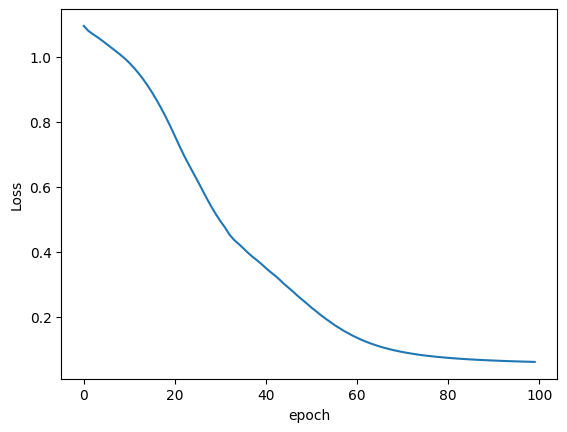

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

## Validate the model
Now we run the test set through the model to see if the loss calculation resembles the training data.

In [ ]:
help(torch.no_grad)

Help on class no_grad in module torch.autograd.grad_mode:

class no_grad(torch.utils._contextlib._DecoratorContextManager)
 |  no_grad() -> None
 |  
 |  Context-manager that disabled gradient calculation.
 |  
 |  Disabling gradient calculation is useful for inference, when you are sure
 |  that you will not call :meth:`Tensor.backward()`. It will reduce memory
 |  consumption for computations that would otherwise have `requires_grad=True`.
 |  
 |  In this mode, the result of every computation will have
 |  `requires_grad=False`, even when the inputs have `requires_grad=True`.
 |  
 |  This context manager is thread local; it will not affect computation
 |  in other threads.
 |  
 |  Also functions as a decorator. (Make sure to instantiate with parenthesis.)
 |  
 |  .. note::
 |      No-grad is one of several mechanisms that can enable or
 |      disable gradients locally see :ref:`locally-disable-grad-doc` for
 |      more information on how they compare.
 |  
 |  .. note::
 |     

In [ ]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06247784


In [ ]:
y_test

tensor([1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0,
        2, 2, 1, 1, 2, 2])

In [ ]:
y_val

tensor([[ -0.3360,   7.3629,   1.3780],
        [  0.2770,   8.1552,   0.4267],
        [ 11.9968,   6.1842, -19.1980],
        [ -2.0192,   7.9662,   4.2445],
        [ -6.1353,   7.9516,  11.0908],
        [-10.2640,   8.3102,  17.9992],
        [ 12.0541,   6.4316, -19.2913],
        [ 12.9496,   6.4815, -20.7530],
        [ -5.7727,   8.2435,  10.5079],
        [ -7.8872,   8.6126,  14.0726],
        [ -8.7060,   8.6074,  15.4331],
        [ 11.6348,   5.8164, -18.6210],
        [ -8.1013,   8.2331,  14.3883],
        [ -2.0796,   7.7751,   4.3185],
        [ -6.0833,   8.3916,  11.0582],
        [  0.1354,   7.8658,   0.6406],
        [ -4.0880,   7.7216,   7.6638],
        [ 13.1511,   6.5907, -21.0787],
        [ -1.5649,   8.0220,   3.4751],
        [ -6.2865,   8.9727,  11.4244],
        [ 12.3848,   6.2568, -19.8265],
        [ 13.8199,   7.0854, -22.1532],
        [ -8.8475,   8.3181,  15.6471],
        [ 12.1968,   6.1261, -19.5250],
        [ -5.8089,   7.5468,  10.5336],


In [ ]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}',end='')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            print('\ttrue')
        else:
          print('\t\tfalse')
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-0.3360,  7.3629,  1.3780])     1	true
 2. tensor([0.2770, 8.1552, 0.4267])        1	true
 3. tensor([ 11.9968,   6.1842, -19.1980])  0	true
 4. tensor([-2.0192,  7.9662,  4.2445])     1	true
 5. tensor([-6.1353,  7.9516, 11.0908])     2	true
 6. tensor([-10.2640,   8.3102,  17.9992])  2	true
 7. tensor([ 12.0541,   6.4316, -19.2913])  0	true
 8. tensor([ 12.9496,   6.4815, -20.7530])  0	true
 9. tensor([-5.7727,  8.2435, 10.5079])     2	true
10. tensor([-7.8872,  8.6126, 14.0726])     2	true
11. tensor([-8.7060,  8.6074, 15.4331])     2	true
12. tensor([ 11.6348,   5.8164, -18.6210])  0	true
13. tensor([-8.1013,  8.2331, 14.3883])     2	true
14. tensor([-2.0796,  7.7751,  4.3184])     1	true
15. tensor([-6.0833,  8.3916, 11.0582])     2	true
16. tensor([0.1354, 7.8658, 0.6407])        1	true
17. tensor([-4.0880,  7.7216,  7.6638])     2		false
18. tensor([ 13.1511,   6.5907, -21.0787])  0	true
19. tensor([-1.5649,  8.0220,  3.4751])     1	true
20. tensor([-6.2865,  8.9727,

Here we can see that #17 was misclassified.

In [ ]:
'''Save the model’s state dictionary using .pt if u have access to Model class in future
Else save the entire Model class including its class and parameters then save it as pickle file and instead of passing a state dictionary pass the model directly'''

'Save the model’s state dictionary if u have access to\nModel class using .pt\nElse save the entire Model class including its class and parameters then save it as pickle file and instead of passing a state dictionary pass the\xa0model\xa0directly'

## Save the trained model to a file
Right now <strong><tt>model</tt></strong> has been trained and validated, and seems to correctly classify an iris 97% of the time. Let's save this to disk.<br>
The tools we'll use are <a href='https://pytorch.org/docs/stable/torch.html#torch.save'><strong><tt>torch.save()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.load'><strong><tt>torch.load()</tt></strong></a><br>

There are two basic ways to save a model.<br>

The first saves/loads the `state_dict` (learned parameters) of the model, but not the model class. The syntax follows:<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model.state_dict(), PATH)<br><br>
<strong>Load:</strong>&nbsp;model = TheModelClass(\*args, \*\*kwargs)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.load_state_dict(torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

The second saves the entire model including its class and parameters as a pickle file. Care must be taken if you want to load this into another notebook to make sure all the target data is brought in properly.<br>
<tt><strong>Save:</strong>&nbsp;torch.save(model, PATH)<br><br>
<strong>Load:</strong>&nbsp;model = torch.load(PATH))<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;model.eval()</tt>

In either method, you must call <tt>model.eval()</tt> to set dropout and batch normalization layers to evaluation mode before running inference. Failing to do this will yield inconsistent inference results.

For more information visit https://pytorch.org/tutorials/beginner/saving_loading_models.html

### Save the model

In [ ]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

### Load a new model
We'll load a new model object and test it as we had before to make sure it worked.

In [ ]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [ ]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06247784


## Apply the model to classify new, unseen data

In [ ]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

Let's plot this new iris in yellow to see where it falls in relation to the others:

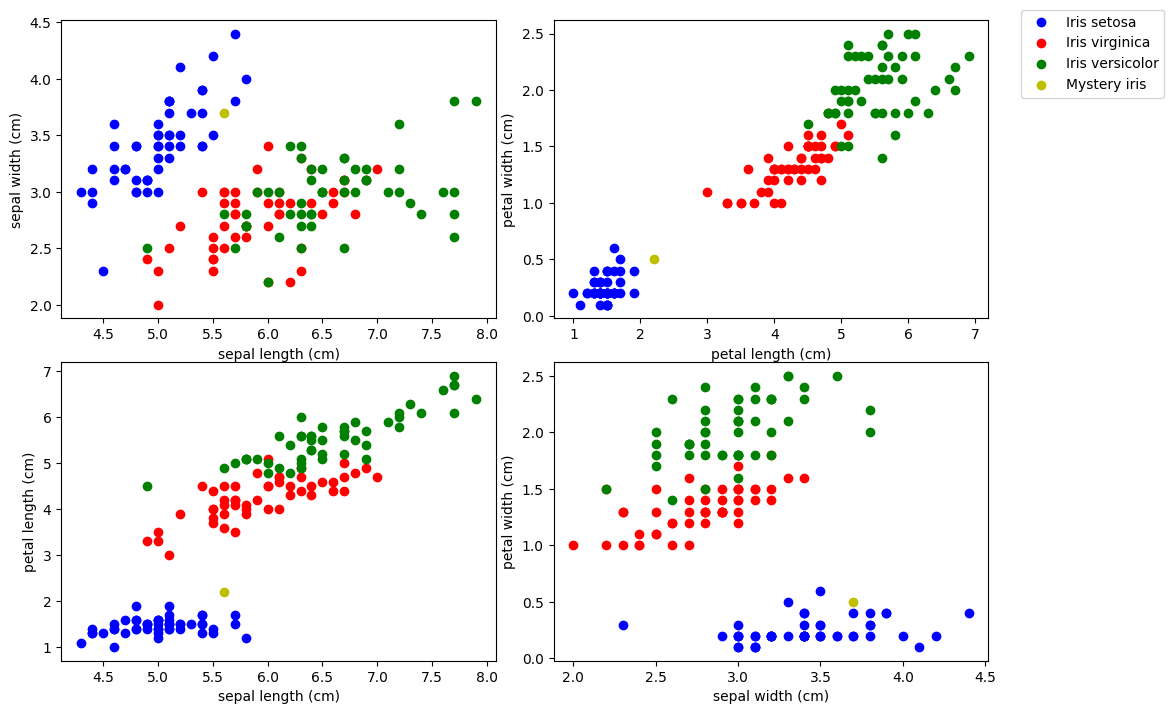

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

Now run it through the model:

In [ ]:

with torch.no_grad():
    print(new_model.forward(mystery_iris))

tensor([ 12.2112,   7.1279, -19.5248])


In [ ]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([ 12.2112,   7.1279, -19.5248])

Iris setosa


## Great job!

In [ ]:
import torch
import torch.nn as nn

loss = nn.CrossEntropyLoss()
torch.manual_seed(20)

input = torch.randn(1, 5, requires_grad=True)
target = torch.empty(1, dtype=torch.long).random_(5)
output = loss(input, target)


output = loss(input, target)
output

tensor(2.8133, grad_fn=<NllLossBackward0>)

categorical Cross entropy = -[(pi log pi')] for each class
pi is the actual probability of belonging to that  class either 0 or 1
0 for not belonging to that class
1 for belonging to that class


.cross_entropy() function automatically applies the softmax function to the logits and calculates the cross-entropy loss.

Softmax --- exp(zi)/sigma (exp (zi))

In [ ]:
print(f'{input}\n{target}\n{output}')

tensor([[-1.2061,  0.0617,  1.1632, -1.5008, -1.5944]], requires_grad=True)
tensor([0])
2.813300609588623


In [ ]:
import numpy as np
np.log((np.exp(-1.2061))/(np.exp(-1.2061)+np.exp(0.0617)+np.exp(1.1632)+np.exp(-1.5008)+np.exp(-1.5944)))

-2.8133645871738993

In [ ]:
loss = nn.CrossEntropyLoss()
torch.manual_seed(10)

input = torch.randn(2, 5, requires_grad=True)
target = torch.empty(2, dtype=torch.long).random_(5)
output = loss(input, target)
print(f'{input}\n{target}\n{output}')

tensor([[-0.6014, -1.0122, -0.3023, -1.2277,  0.9198],
        [-0.3485, -0.8692, -0.9582, -1.1920,  1.9050]], requires_grad=True)
tensor([3, 4])
1.4799609184265137


In [ ]:
[np.log((np.exp(-1.2277))/(np.exp(-0.6014)+np.exp(-1.0122)+np.exp(-0.3023)+np.exp(-1.2277)+np.exp( 0.9198)))]

[-2.7211282102810865]

In [ ]:
[np.log((np.exp(1.9050))/(np.exp(-0.3485)+np.exp(-0.8692)+np.exp(-0.9582)+np.exp(-1.1920)+np.exp( 1.9050)))]

[-0.23878119898091302]

In [ ]:
(2.7211282102810865+0.23878119898091302)/2

1.4799547046309998